1990-2022 YILLARI ARASINDA ÜLKELERİN VE BÖLGELERİN YENİLENEBİLİR ENERJİ TÜKETİMİ 

Projenin Amacı

Bu projenin temel amacı, ülkeler bazında yenilenebilir enerji tüketiminin yıllar içerisindeki değişimini analiz ederek:

-Yenilenebilir enerji kullanımındaki zamanla oluşan eğilimleri incelemek

-Ülkeler arasında enerji tüketim seviyelerini ve artış hızlarını karşılaştırmak

-Veri temizleme ve keşifsel veri analizi (EDA) adımlarını uygulayarak ham veriden anlamlı sonuçlar üretmek

-Grafikler ve istatistiksel yöntemler aracılığıyla enerji dönüşümüne dair yorumlar yapmak

-Yenilenebilir enerjiye geçişin sürdürülebilirlik açısından önemini veri temelli şekilde ortaya koymak

Veri Ön İşleme 

Analiz öncesinde veri seti üzerinde şu işlemler yapılmıştır:

-Tamamı boş olan satır ve sütunlar temizlenmiştir

-Veri seti yeniden indekslenerek analize uygun hale getirilmiştir

-Veri tipleri kontrol edilerek sayısal analizlere hazır hale getirilmiştir

-Bu adımlar, analiz sonuçlarının daha güvenilir ve tutarlı olmasını sağlamıştır.

In [39]:
# Temel kütüphaneler
import pandas as pd
import numpy as np

# Görselleştirme için gerekli olanlar 
import matplotlib.pyplot as plt
import seaborn as sns

# İstatistiksel analiz için 
from scipy import stats
#veri setimiz büyük olduğu için inceleme kolaylığı adına birkaç ayar ekledik
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)


In [ ]:
xls = pd.ExcelFile("renewable_energy.xlsx")
data_sheets=xls.sheet_names
print(data_sheets)
#kullanacağımız sayfayı bulmak adına kullandığımız excel dosyasındaki sayfaları yazdırdık 


['Notes on sources', '7.2 Official indicator', '7.2 Official indicator notes', '7.2 SDG7 Report data (raw)', '7.2 SDG7 Report data (table)', '7.2 SDG7 Report data notes']


In [ ]:
data_sheets = [] #veri içeren sayfa isimleriyle liste oluşturduk

for sheet in xls.sheet_names:
    df = pd.read_excel("renewable_energy.xlsx", sheet_name=sheet)
    
    # Sayfanın tamamen yazı ve boşluktan ibaret olup olmadığını kontrol ettik
    numeric_count = df.select_dtypes(include="number").shape[1]
    
    if numeric_count > 0:  
        data_sheets.append(sheet)

print("Gerçek veri içeren sayfalar:")
data_sheets
#bunu yapmamızdaki amaç gerçek veri içeren sayfaları bulmak

Gerçek veri içeren sayfalar:


['Notes on sources',
 '7.2 Official indicator notes',
 '7.2 SDG7 Report data (raw)',
 '7.2 SDG7 Report data (table)',
 '7.2 SDG7 Report data notes']

In [42]:
df = pd.read_excel("renewable_energy.xlsx", sheet_name="7.2 SDG7 Report data (raw)")
df.head(5)
#veri setimizin ilk 5 satırını yazdırdık

,GeoAreaCode,GeoAreaName,Flow,Product,Source,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,4,Afghanistan,Total final energy consumption (PJ),Total,"Energy Balances, UN Statistics Division (2024)",32.7,31.4,27.2,27.5,27.6,27.6,27.5,27.1,27.0,24.8,25.1,25.2,31.7,34.1,28.7,39.0,45.0,52.8,70.8,101.4,129.8,173.8,154.2,143.5,142.5,156.1,146.5,156.0,167.6,171.6,181.2,165.9,168.6
1,4,Afghanistan,Share in total final energy consumption (%),Renewables,"Energy Balances, UN Statistics Division (2024)",23.0,23.7,27.4,28.5,30.1,31.8,33.9,36.4,38.0,43.4,45.0,45.6,37.8,36.7,44.2,33.9,31.9,28.8,21.2,16.5,15.2,12.6,15.4,16.9,19.1,17.7,20.2,19.5,18.3,18.9,18.2,20.0,20.0
2,4,Afghanistan,Share in total final energy consumption (%),Modern renewables,"Energy Balances, UN Statistics Division (2024)",6.7,6.2,5.9,5.8,5.7,5.6,5.7,5.8,5.9,6.6,6.6,6.4,5.9,6.1,7.1,5.8,7.1,7.2,4.8,4.9,5.8,5.6,7.3,8.1,10.0,9.3,11.1,10.8,10.1,10.8,10.4,11.3,11.3
3,4,Afghanistan,Share in total final energy consumption (%),Municipal waste (renew),"Energy Balances, UN Statistics Division (2024)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Afghanistan,Share in total final energy consumption (%),Liquid biofuels,"Energy Balances, UN Statistics Division (2024)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df.tail(5)
#veri setimizin son 5 satırını yazdırdık

,GeoAreaCode,GeoAreaName,Flow,Product,Source,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4060,514,Developed regions (MDG),Share in total final energy consumption (%),Wind,"IEA (2024), World Energy Balances; Energy Bala...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.3,0.4,0.5,0.5,0.7,0.8,0.9,1.0,1.2,1.2,1.4,1.5,1.6,2.0,1.9,2.2
4061,514,Developed regions (MDG),Share in total final energy consumption (%),Solar,"IEA (2024), World Energy Balances; Energy Bala...",0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.5,0.6,0.6,0.7,0.8,0.9,1.1,1.2,1.4
4062,514,Developed regions (MDG),Final consumption of renewable energy (PJ) - H...,Renewables,"IEA (2024), World Energy Balances; Energy Bala...",4040.7,4270.7,4448.6,4220.3,4097.0,4362.8,4463.7,4438.9,4553.9,5378.6,5363.4,5000.3,4916.0,5337.6,5499.4,5782.4,5973.9,6189.4,6214.8,6089.0,6566.2,6400.0,6521.8,6834.2,6656.3,6676.6,6670.7,6782.5,7287.5,7388.3,7133.6,7453.1,7303.2
4063,514,Developed regions (MDG),Final consumption of renewable energy (PJ) - T...,Renewables,"IEA (2024), World Energy Balances; Energy Bala...",125.4,121.4,115.2,207.5,214.9,228.2,200.1,225.8,234.9,240.7,269.5,278.7,323.6,401.3,484.5,591.7,822.9,1070.2,1388.5,1585.7,1723.3,1872.8,2034.5,2129.6,2197.4,2231.8,2349.7,2396.3,2455.8,2516.7,2367.4,2595.5,2754.9
4064,514,Developed regions (MDG),Final consumption of renewable energy (PJ) - E...,Renewables,"IEA (2024), World Energy Balances; Energy Bala...",4222.7,4312.6,4273.6,4483.8,4428.7,4662.7,4707.1,4764.3,4712.5,4779.3,4844.2,4683.3,4819.9,4798.0,5023.9,5163.8,5310.6,5391.3,5635.1,5812.2,6060.5,6383.4,6674.5,7204.8,7407.3,7590.8,7980.0,8371.1,8735.6,8957.0,9713.8,9941.3,10326.4


In [44]:
df.describe().T #sayısal kolonların özet istatistiklerni verip tablomuzu kolayca görebilmek için transpose ettik


,count,mean,std,min,25%,50%,75%,max
GeoAreaCode,4065.0,399.929889,264.757835,1.0,154.0,408.0,630.000,894.0
1990,3785.0,430.854637,5939.949950,0.0,0.0,0.0,6.500,236988.6
1991,3806.0,432.678035,5961.150462,0.0,0.0,0.0,6.500,239054.6
1992,3882.0,422.185549,5845.520418,0.0,0.0,0.0,6.300,237700.1
1993,3886.0,425.466418,5887.331293,0.0,0.0,0.0,6.500,239703.2
1994,3886.0,426.251750,5879.364702,0.0,0.0,0.0,6.700,240174.1
1995,3909.0,432.914172,5974.095472,0.0,0.0,0.0,6.900,245414.1
1996,3910.0,438.757059,6054.076974,0.0,0.0,0.0,7.200,249023.3
1997,3912.0,441.942152,6089.578945,0.0,0.0,0.0,7.225,251144.6
1998,3914.0,443.285105,6097.130105,0.0,0.0,0.0,7.075,251944.1


In [45]:

df.isna().sum() #sütünlardaki eksik değer sayısını gösterir
print((df.isna().sum() / len(df) * 100).round(2))
# eksik değerler karar vermede çok mu az mı görmek için eksik satır yüzdelerini yazdırdık



GeoAreaCode    0.00
GeoAreaName    0.00
Flow           0.00
Product        0.00
Source         0.00
1990           6.89
1991           6.37
1992           4.50
1993           4.40
1994           4.40
1995           3.84
1996           3.81
1997           3.76
1998           3.71
1999           3.71
2000           2.73
2001           2.73
2002           1.94
2003           1.94
2004           1.97
2005           1.55
2006           1.53
2007           1.48
2008           1.28
2009           1.28
2010           1.28
2011           3.32
2012           2.14
2013           2.14
2014           2.19
2015           2.12
2016           2.21
2017           2.19
2018           2.21
2019           2.12
2020           2.14
2021           2.14
2022           2.21
dtype: float64


In [46]:
print("Veri tipleri\n",df.dtypes)


Veri tipleri
 GeoAreaCode      int64
GeoAreaName     object
Flow            object
Product         object
Source          object
1990           float64
1991           float64
1992           float64
1993           float64
1994           float64
1995           float64
1996           float64
1997           float64
1998           float64
1999           float64
2000           float64
2001           float64
2002           float64
2003           float64
2004           float64
2005           float64
2006           float64
2007           float64
2008           float64
2009           float64
2010           float64
2011           float64
2012           float64
2013           float64
2014           float64
2015           float64
2016           float64
2017           float64
2018           float64
2019           float64
2020           float64
2021           float64
2022           float64
dtype: object


In [47]:
df_clean = df.dropna(how="all") #tamamı boş olan satırları sildik       
df_clean = df_clean.dropna(how="all", axis=1)  #tamamı boş olan sütünları sildik
df_clean = df_clean.reset_index(drop=True) #silinen satırlardan sonra oluşan bozuk sıralamayı düzelttik

df_clean.head(5) #temizlenmiş verinin ilk 5 satırını yazdırdık


,GeoAreaCode,GeoAreaName,Flow,Product,Source,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,4,Afghanistan,Total final energy consumption (PJ),Total,"Energy Balances, UN Statistics Division (2024)",32.7,31.4,27.2,27.5,27.6,27.6,27.5,27.1,27.0,24.8,25.1,25.2,31.7,34.1,28.7,39.0,45.0,52.8,70.8,101.4,129.8,173.8,154.2,143.5,142.5,156.1,146.5,156.0,167.6,171.6,181.2,165.9,168.6
1,4,Afghanistan,Share in total final energy consumption (%),Renewables,"Energy Balances, UN Statistics Division (2024)",23.0,23.7,27.4,28.5,30.1,31.8,33.9,36.4,38.0,43.4,45.0,45.6,37.8,36.7,44.2,33.9,31.9,28.8,21.2,16.5,15.2,12.6,15.4,16.9,19.1,17.7,20.2,19.5,18.3,18.9,18.2,20.0,20.0
2,4,Afghanistan,Share in total final energy consumption (%),Modern renewables,"Energy Balances, UN Statistics Division (2024)",6.7,6.2,5.9,5.8,5.7,5.6,5.7,5.8,5.9,6.6,6.6,6.4,5.9,6.1,7.1,5.8,7.1,7.2,4.8,4.9,5.8,5.6,7.3,8.1,10.0,9.3,11.1,10.8,10.1,10.8,10.4,11.3,11.3
3,4,Afghanistan,Share in total final energy consumption (%),Municipal waste (renew),"Energy Balances, UN Statistics Division (2024)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Afghanistan,Share in total final energy consumption (%),Liquid biofuels,"Energy Balances, UN Statistics Division (2024)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:

df=df_clean.copy() #df üzerindeyaptığımız değişiklik df_clean i bozmaması için
df_clean.tail(5) 

,GeoAreaCode,GeoAreaName,Flow,Product,Source,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
4060,514,Developed regions (MDG),Share in total final energy consumption (%),Wind,"IEA (2024), World Energy Balances; Energy Bala...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1,0.2,0.2,0.2,0.3,0.4,0.5,0.5,0.7,0.8,0.9,1.0,1.2,1.2,1.4,1.5,1.6,2.0,1.9,2.2
4061,514,Developed regions (MDG),Share in total final energy consumption (%),Solar,"IEA (2024), World Energy Balances; Energy Bala...",0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2,0.3,0.3,0.4,0.5,0.6,0.6,0.7,0.8,0.9,1.1,1.2,1.4
4062,514,Developed regions (MDG),Final consumption of renewable energy (PJ) - H...,Renewables,"IEA (2024), World Energy Balances; Energy Bala...",4040.7,4270.7,4448.6,4220.3,4097.0,4362.8,4463.7,4438.9,4553.9,5378.6,5363.4,5000.3,4916.0,5337.6,5499.4,5782.4,5973.9,6189.4,6214.8,6089.0,6566.2,6400.0,6521.8,6834.2,6656.3,6676.6,6670.7,6782.5,7287.5,7388.3,7133.6,7453.1,7303.2
4063,514,Developed regions (MDG),Final consumption of renewable energy (PJ) - T...,Renewables,"IEA (2024), World Energy Balances; Energy Bala...",125.4,121.4,115.2,207.5,214.9,228.2,200.1,225.8,234.9,240.7,269.5,278.7,323.6,401.3,484.5,591.7,822.9,1070.2,1388.5,1585.7,1723.3,1872.8,2034.5,2129.6,2197.4,2231.8,2349.7,2396.3,2455.8,2516.7,2367.4,2595.5,2754.9
4064,514,Developed regions (MDG),Final consumption of renewable energy (PJ) - E...,Renewables,"IEA (2024), World Energy Balances; Energy Bala...",4222.7,4312.6,4273.6,4483.8,4428.7,4662.7,4707.1,4764.3,4712.5,4779.3,4844.2,4683.3,4819.9,4798.0,5023.9,5163.8,5310.6,5391.3,5635.1,5812.2,6060.5,6383.4,6674.5,7204.8,7407.3,7590.8,7980.0,8371.1,8735.6,8957.0,9713.8,9941.3,10326.4


In [49]:
df.columns.tolist() #sütün adları


['GeoAreaCode',
 'GeoAreaName',
 'Flow',
 'Product',
 'Source',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [50]:
columns_to_drop = ['GeoAreaCode', 'Source']

df = df.drop(columns=columns_to_drop, errors='ignore')
#gereksiz sütünları sildik
df = df.dropna(axis=1, how='all')
#boş sütünları sildik



In [ ]:
# hataları minimize etmek için  Product ve GeoAreaName sütunlarını string olarak çevirdik 
df['Product'] = df['Product'].astype(str).str.strip()
df['GeoAreaName'] = df['GeoAreaName'].astype(str).str.strip()
if 'Flow' in df.columns:
    df['Flow'] = df['Flow'].astype(str).str.strip()

# Yılları tespit ettik
year_cols = [c for c in df.columns if isinstance(c, str) and c.isdigit() and 1900 <= int(c) <= 2100]
year_cols = sorted(year_cols, key=lambda x: int(x))
print("Year columns:", year_cols)

# Yılları sayısala çevir (NaN oluşturabilecek metinleri float'a)
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

Year columns: ['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [52]:
other_than_country = [
    "Developing regions (MDG)",
    "Developed regions (MDG)",
    "Western Asia (M49) and Northern Africa (M49)",
    "Western Europe (M49)",
    "Western Africa (M49)",
    "Southern Europe (M49)",
    "Southern Africa (M49)",
    "South America (M49)",
    "Polynesia (M49)",
    "Northern Europe (M49)",
    "Middle Africa (M49)",
    "Micronesia (M49)",
    "Melanesia (M49)",
    "Eastern Europe (M49)",
    "Eastern Africa (M49)",
    "Central America (M49)",
    "Caribbean (M49)",
    "Americas (M49)",
    "Asia (M49)",
    "Africa (M49)",
    "Landlocked developing countries (LLDCs)",
    "Small island developing States (SIDS)",
    "Least Developed Countries (LDCs)",
    "Australia and New Zealand (M49)",
    "Oceania (M49) excluding Australia and New Zealand (M49)",
    "Oceania (M49)",
    "Sub-Saharan Africa (M49)",
    "Northern Africa (M49)",
    "Western Asia (M49)",
    "South-eastern Asia (MDG=M49)",
    "Eastern Asia (M49)",
    "Eastern Asia (M49) and South-eastern Asia (MDG=M49)",
    "Southern Asia (MDG=M49)",
    "Central Asia (M49)",
    "Central Asia (M49) and Southern Asia (MDG=M49)",
    "Latin America and the Caribbean (MDG=M49)",
    "Northern America (M49)",
    "Europe (M49)",
    "Northern America (M49) and Europe (M49)",
    "World"
]
#ülke dışındaki bölge ve kıtalar için ayrı bir liste oluşturduk oluşturacağımız grafiklerde ve makine öğrenmesi kısmında yanlış analizler yapılmasını önlemek için liste oluşturduk 


In [53]:
df_countries_only = df_clean[~df_clean["GeoAreaName"].isin(other_than_country)].copy()
#ülke harici olan kısımları çıkardık 

In [54]:
df_countries_only = df_countries_only.rename(columns={"GeoAreaName": "countries"})
df=df.rename(columns={"GeoAreaName": "countries"})
df_clean=df_clean.rename(columns={"GeoAreaName": "countries"})
#daha kolay çalışabilmek için sütün adını değiştirdik

In [55]:
df_countries_only.head(5)

,GeoAreaCode,countries,Flow,Product,Source,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,4,Afghanistan,Total final energy consumption (PJ),Total,"Energy Balances, UN Statistics Division (2024)",32.7,31.4,27.2,27.5,27.6,27.6,27.5,27.1,27.0,24.8,25.1,25.2,31.7,34.1,28.7,39.0,45.0,52.8,70.8,101.4,129.8,173.8,154.2,143.5,142.5,156.1,146.5,156.0,167.6,171.6,181.2,165.9,168.6
1,4,Afghanistan,Share in total final energy consumption (%),Renewables,"Energy Balances, UN Statistics Division (2024)",23.0,23.7,27.4,28.5,30.1,31.8,33.9,36.4,38.0,43.4,45.0,45.6,37.8,36.7,44.2,33.9,31.9,28.8,21.2,16.5,15.2,12.6,15.4,16.9,19.1,17.7,20.2,19.5,18.3,18.9,18.2,20.0,20.0
2,4,Afghanistan,Share in total final energy consumption (%),Modern renewables,"Energy Balances, UN Statistics Division (2024)",6.7,6.2,5.9,5.8,5.7,5.6,5.7,5.8,5.9,6.6,6.6,6.4,5.9,6.1,7.1,5.8,7.1,7.2,4.8,4.9,5.8,5.6,7.3,8.1,10.0,9.3,11.1,10.8,10.1,10.8,10.4,11.3,11.3
3,4,Afghanistan,Share in total final energy consumption (%),Municipal waste (renew),"Energy Balances, UN Statistics Division (2024)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Afghanistan,Share in total final energy consumption (%),Liquid biofuels,"Energy Balances, UN Statistics Division (2024)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_countries_only.tail(5)

,GeoAreaCode,countries,Flow,Product,Source,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
3460,716,Zimbabwe,Share in total final energy consumption (%),Wind,"IEA (2024), World Energy Balances",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3461,716,Zimbabwe,Share in total final energy consumption (%),Solar,"IEA (2024), World Energy Balances",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3462,716,Zimbabwe,Final consumption of renewable energy (PJ) - H...,Renewables,"IEA (2024), World Energy Balances",197.6,201.6,205.3,208.8,212.6,215.6,218.1,221.0,225.2,229.3,92.7,94.3,95.2,96.8,98.1,99.5,101.3,103.0,103.7,104.8,106.3,107.6,109.4,111.4,113.7,115.8,117.8,120.3,121.6,123.3,124.8,126.2,127.5
3463,716,Zimbabwe,Final consumption of renewable energy (PJ) - T...,Renewables,"IEA (2024), World Energy Balances",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,1.5,1.4,1.0,1.7,1.7,1.9,1.9,1.9,2.0
3464,716,Zimbabwe,Final consumption of renewable energy (PJ) - E...,Renewables,"IEA (2024), World Energy Balances",15.1,11.6,11.7,8.1,8.7,9.6,10.4,10.8,10.7,15.9,17.3,13.8,16.5,22.7,20.6,19.6,25.1,23.2,20.4,19.2,18.0,16.7,17.0,16.1,16.5,14.1,11.3,15.5,17.1,14.3,14.8,21.1,21.2


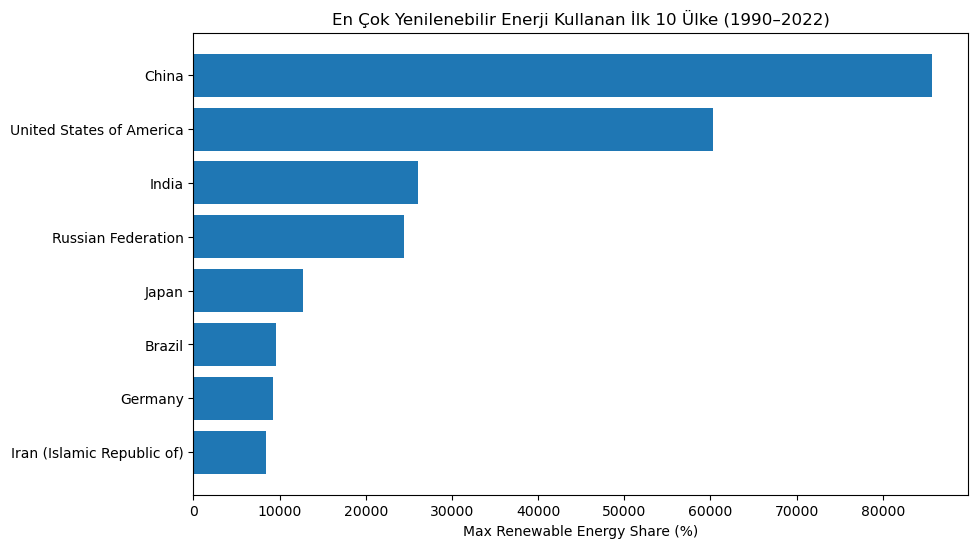

In [57]:
df_max = df_countries_only[["countries"] + year_cols].copy()
df_max["max_renew"] = df_max[year_cols].max(axis=1)
df_max_sorted = df_max[["countries", "max_renew"]].sort_values(by="max_renew", ascending=False)
df_max_sorted.head()
top10 = df_max_sorted.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top10["countries"], top10["max_renew"])
plt.gca().invert_yaxis()
plt.xlabel("Max Renewable Energy Share (%)")
plt.title("En Çok Yenilenebilir Enerji Kullanan İlk 10 Ülke (1990–2022)")
plt.show()
# Yatay çubuk grafik kullanılarak yenilenebilir enerji kullanımında öne çıkan ülkeleri görselleştirdik

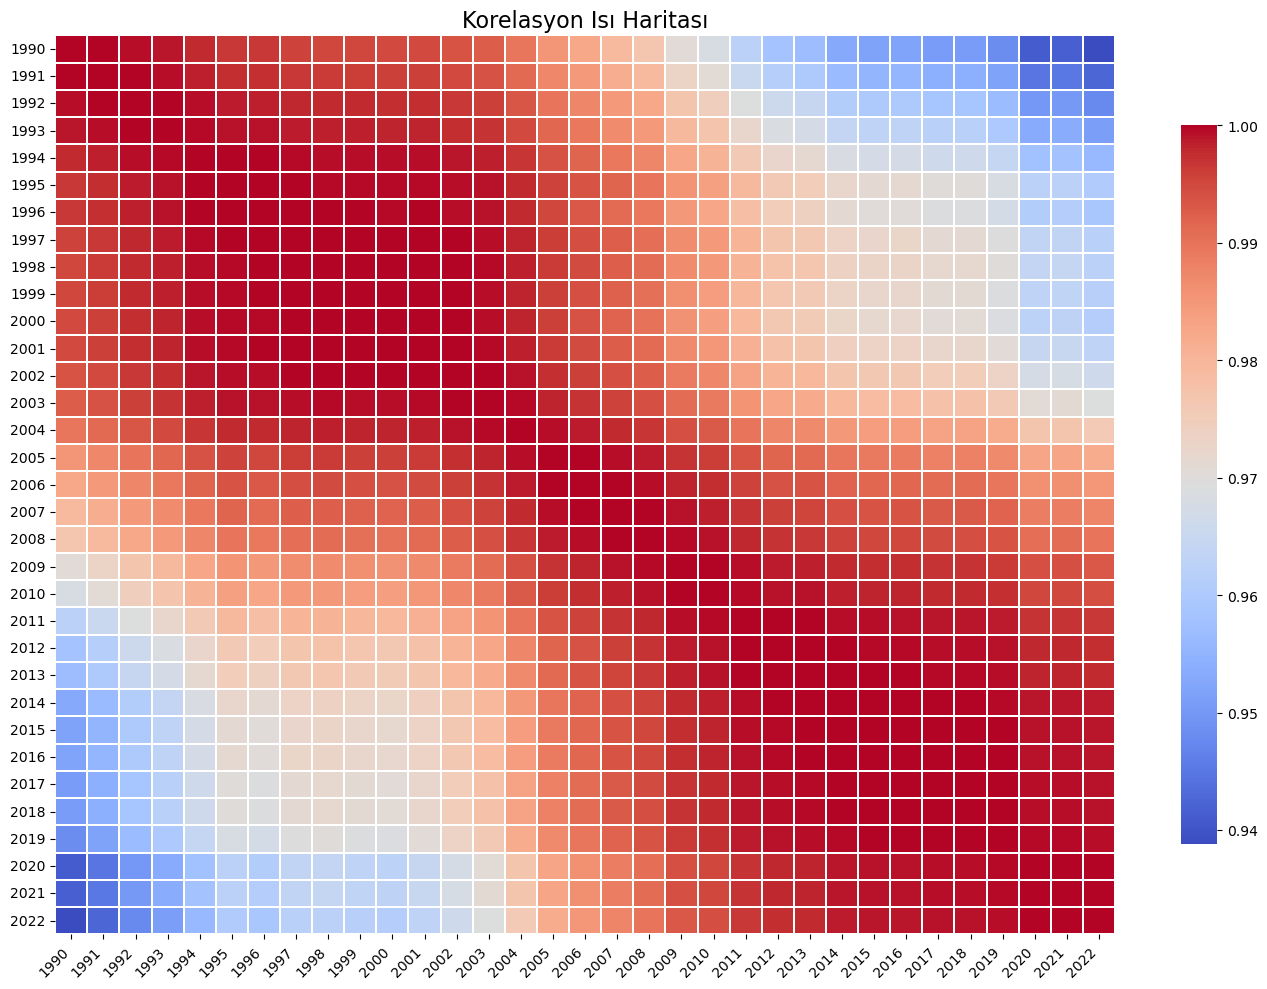

In [ ]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    annot=False,        
    linewidths=0.3,
    cbar_kws={"shrink": 0.8}
)

plt.title("Korelasyon Isı Haritası", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()
#İki yıl arasındaki veri benzerliğini göstermek için korelasyon ısı haritasını kullandık grafiğe baktığımızda yenilenebilir enerji kullanımının yıllar boyunca tutarlı ve sürekli artış gösterdiğini görüyoruz.


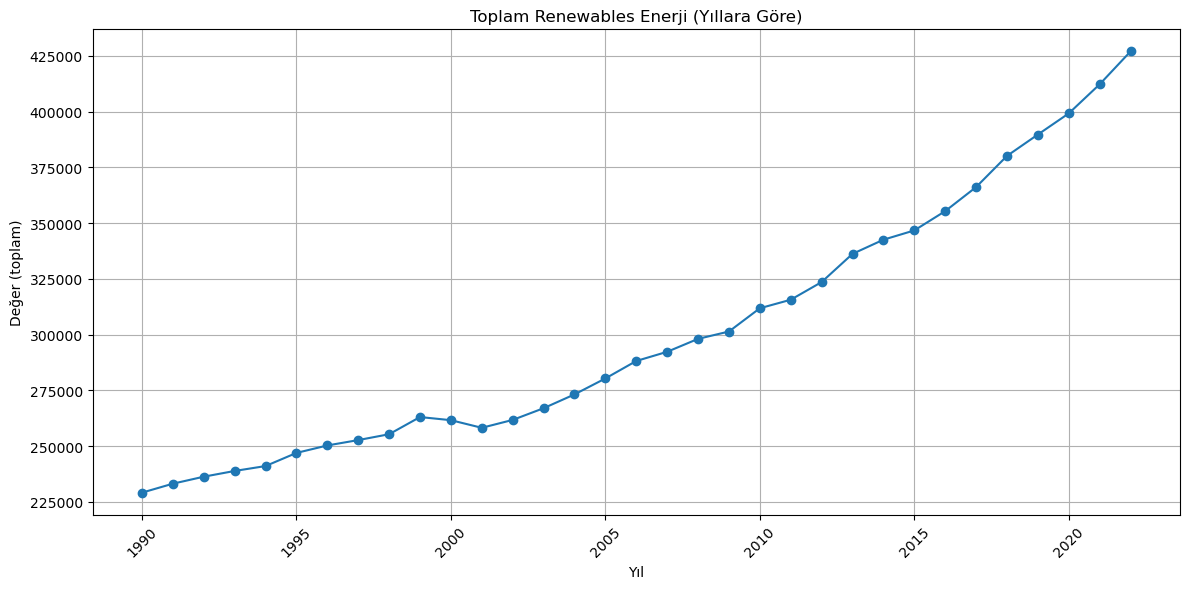

In [59]:
product_name = "Renewables"   
df_prod = df[df['Product'] == product_name].copy()

if df_prod.empty:
    print(f"'{product_name}' adına tam eşleşen satır bulunamadı. Mevcut product örnekleri:\n", df['Product'].unique()[:50])
else:
    renewable_yearly = df_prod[year_cols].sum(axis=0, skipna=True)
    plt.figure(figsize=(12,6))
    plt.plot(list(map(int, renewable_yearly.index)), renewable_yearly.values, marker='o')
    plt.title(f"Toplam {product_name} Enerji (Yıllara Göre)")
    plt.xlabel("Yıl")
    plt.ylabel("Değer (toplam)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
#zaman serisi grafiği kullanarak yıllara göre yenilenebilir enerji kullanımının nasıl arttığını inceledik 

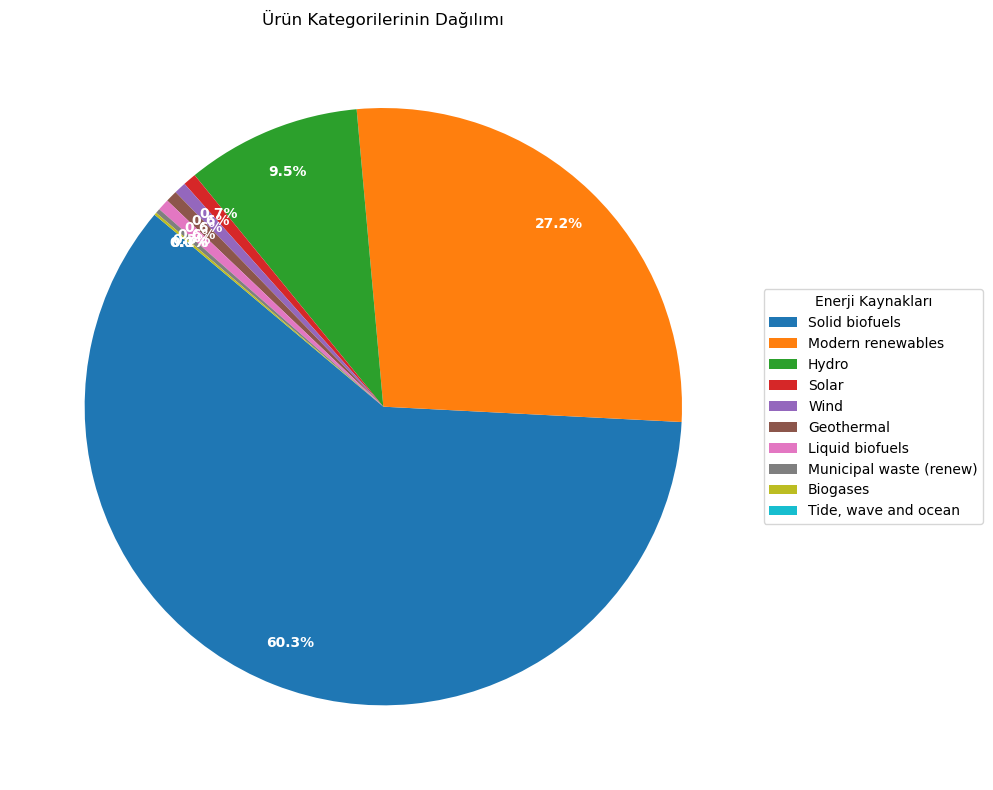

In [60]:
df['Total'] = df[year_cols].sum(axis=1, skipna=True)
filtered = df[(df['Product'] != "Total") & (df['Product'] != "Renewables")]
product_totals = filtered.groupby("Product")["Total"].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 8)) 
wedges, texts, autotexts = plt.pie(
    product_totals.head(10), 
    labels=None, 
    autopct="%1.1f%%",
    startangle=140,
    pctdistance=0.85, 
    textprops=dict(color="white", weight="bold")
)
plt.legend(
    wedges, 
    product_totals.head(10).index, 
    title="Enerji Kaynakları",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1) 
)
plt.title("Ürün Kategorilerinin Dağılımı")
plt.tight_layout()
plt.show()
#pie chart kullanarak yenilenebilir enerji kaynaklarının toplam dağılımını gösterdik

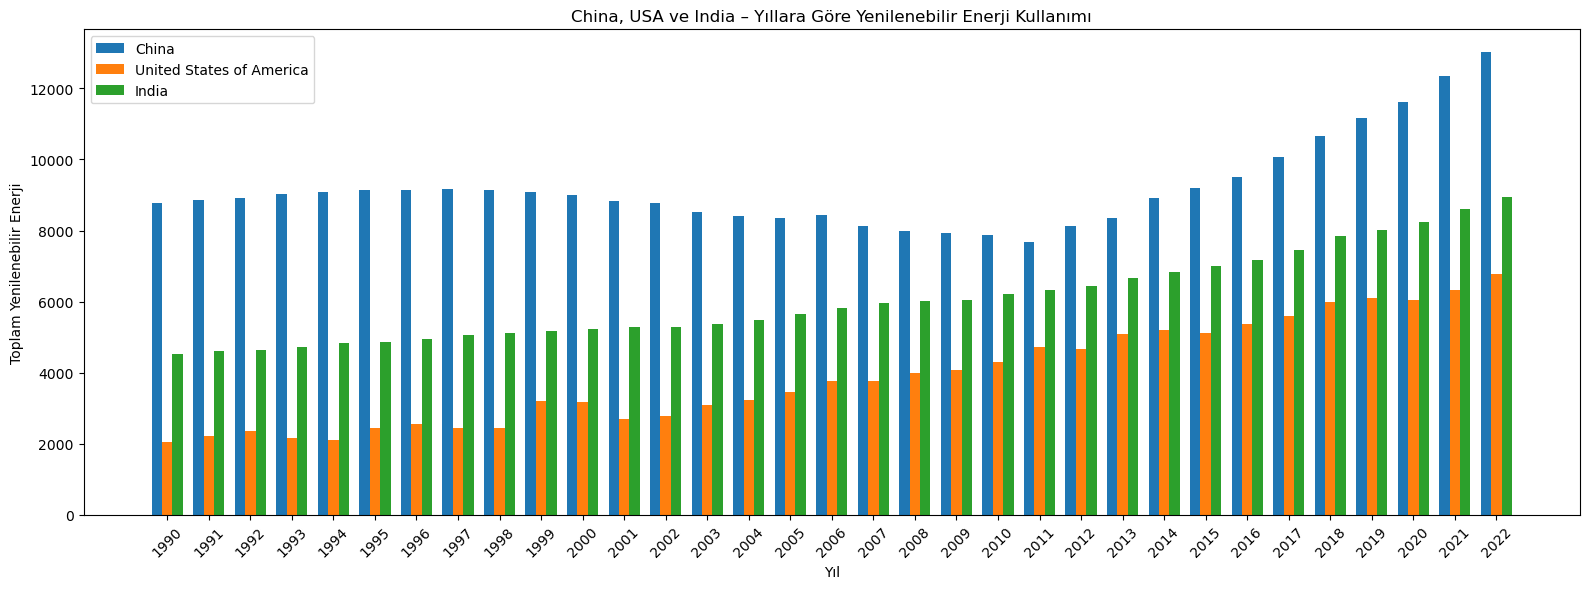

In [ ]:
years = list(range(1990, 2023))
year_cols = list(map(str, years))

countries_of_interest = ["China", "United States of America", "India"]

plt.figure(figsize=(16,6))
x = np.arange(len(years))
width = 0.25

for i, country in enumerate(countries_of_interest):
    values = (
        df_countries_only[
            (df_countries_only["countries"] == country) &
            (df_countries_only["Product"] == "Renewables")
        ][year_cols]
        .sum(axis=0)   # aynı ülke için birden fazla satır varsa topla
        .values
    )
    plt.bar(x + i*width, values, width, label=country)

plt.xticks(x + width, years, rotation=45)
plt.xlabel("Yıl")
plt.ylabel("Toplam Yenilenebilir Enerji")
plt.title("China, USA ve India – Yıllara Göre Yenilenebilir Enerji Kullanımı")
plt.legend()
plt.tight_layout()
plt.show()
# gruplu çuubuk grafik kullanarak en çok yenilenebilir enerji kullanan 3 ülkenin yıllara göre toplam yenilenebilir enerji kullanım değerlerini gösterdik

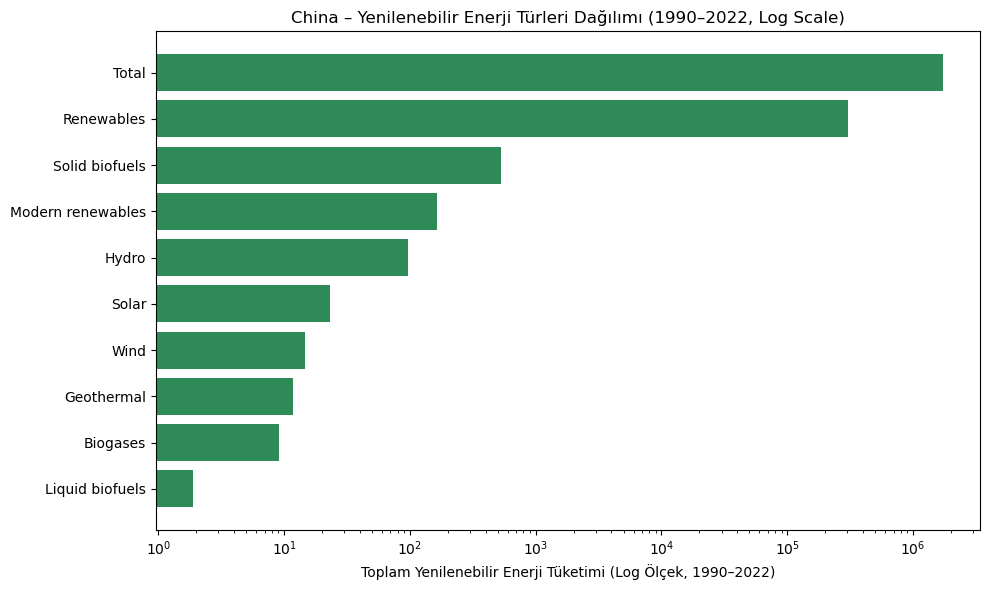

In [ ]:

df_china = df_clean[df_clean["countries"].str.lower() == "china"]
year_cols = [col for col in df_clean.columns if col.isdigit()]
df_pie = df_china[["Product"] + year_cols].copy()
df_pie["total"] = df_pie[year_cols].sum(axis=1)
# 0 değerli satırları attık
df_pie = df_pie[df_pie["total"] > 0]
df_grouped = df_pie.groupby("Product")["total"].sum().reset_index()
df_grouped = df_grouped.sort_values(by="total", ascending=True)
plt.figure(figsize=(10, 6))
plt.barh(df_grouped["Product"], df_grouped["total"], color="seagreen")
#logaritmik ölçek kullanmak zorunda kaldık çünkü total değer diğerlerine göre çok büyük olduğu için grafiğimiz anlaşılabilir değildi
plt.xscale("log")
plt.xlabel("Toplam Yenilenebilir Enerji Tüketimi (Log Ölçek, 1990–2022)")
plt.title("China – Yenilenebilir Enerji Türleri Dağılımı (1990–2022, Log Scale)")
plt.tight_layout()
plt.show()


In [63]:
#1990-2022 yılları arasında en çok yenilenebilir enerji kullanan Çin'in hangi yenilenebilir enerji türlerini kullandığını gösterdik

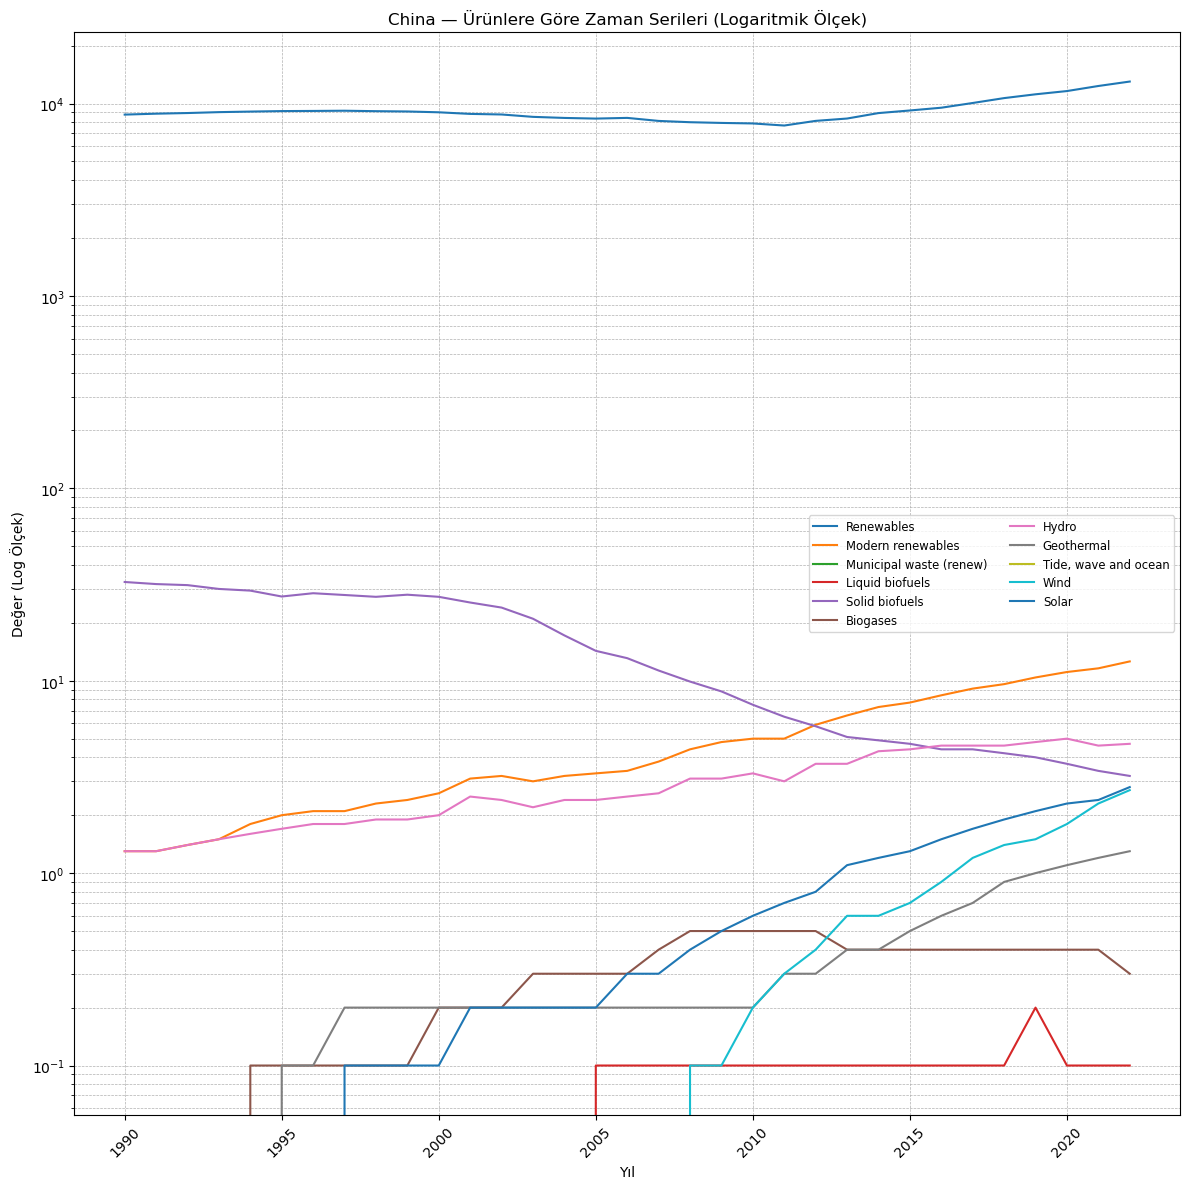

In [64]:
country = "China"

df_countries_only = df[
    (df["countries"] == country) &
    (df["Product"] != "Total")
].copy()

plt.figure(figsize=(12, 12))

for product in df_countries_only['Product'].unique():
    sub = df_countries_only[df_countries_only['Product'] == product]
    series = sub[year_cols].sum(axis=0, skipna=True)
    years = list(map(int, series.index))
    plt.plot(years, series.values, label=product)

plt.title(f"{country} — Ürünlere Göre Zaman Serileri (Logaritmik Ölçek)")
plt.xlabel("Yıl")
plt.ylabel("Değer (Log Ölçek)")
plt.yscale("log")
plt.legend(loc="best", fontsize="small", ncol=2)
plt.xticks(rotation=45)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()




Bu grafik en çok yenilenebilir enerji kullanan Çin’in 1990–2022 yılları arasındaki yenilenebilir enerji kullanımını 
enerji türlerine göre zaman içinde göstermektedir. 

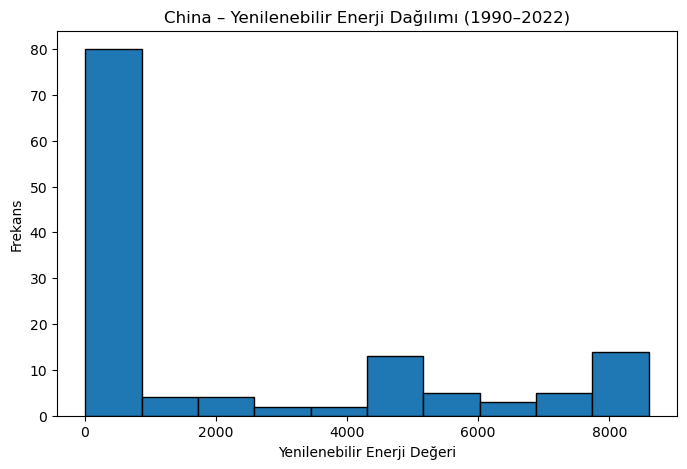

In [65]:
china_renew = df[
    (df["countries"] == "China") &
    (df["Product"] == "Renewables")
][year_cols].values.flatten()

china_renew = china_renew[~np.isnan(china_renew)]

plt.figure(figsize=(8,5))
plt.hist(china_renew, bins=10, edgecolor="black")
plt.xlabel("Yenilenebilir Enerji Değeri")
plt.ylabel("Frekans")
plt.title("China – Yenilenebilir Enerji Dağılımı (1990–2022)")
plt.show()



Bu histogram, Çin’in yenilenebilir enerji kullanımının uzun yıllar boyunca görece düşük seviyelerde kaldığını, 
ancak özellikle son yıllarda belirgin bir artış gösterdiğini ortaya koymaktadır. 
Buna rağmen, incelenen tüm dönem dikkate alındığında kullanımın genel olarak düşük seviyelerde yoğunlaştığı görülmektedir.

In [66]:
year_cols = [col for col in df_clean.columns if col.isdigit()]

df_clean[year_cols] = df_clean[year_cols].interpolate(
    axis=1,       # yatay (yıllar boyunca)
    method="linear"
)
#makine öğrenmesi için eksik verilerimizi doldurduk

In [67]:
X = df_clean[year_cols]


Bu adımda, veri setinden yalnızca yıllara ait sayısal sütunlar seçilerek
makine öğrenmesi modeline girdi olarak kullanılacak özellik matrisi (X)
oluşturulmuştur. Böylece model, zamana bağlı değişimleri öğrenebilecek
şekilde yapılandırılmıştır.

In [68]:
df_ml = df_clean.melt(
    id_vars=["countries", "Product"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Energy"
)


Bu adımda veri seti wide formattan long formata dönüştürülmüştür.
Yıllara ait sütunlar tek bir “Year” değişkeni altında toplanmış,
enerji değerleri ise “Energy” sütununda gösterilmiştir.
Bu yapı, zaman serisi analizi ve makine öğrenmesi modelleri için
daha uygundur.


In [69]:
df_ml["Year"] = df_ml["Year"].astype(int)
df_ml["Energy"] = pd.to_numeric(df_ml["Energy"], errors="coerce")


Bu adımda “Year” değişkeni sayısal forma dönüştürülmüş,
“Energy” sütunu ise sayısal olmayan değerler NaN olacak şekilde
düzenlenmiştir. Bu işlem, makine öğrenmesi modellerinin
doğru ve hatasız çalışması için gereklidir.


In [70]:
df_ml = df_ml.dropna()


Eksik (NaN) değer içeren satırlar analiz ve modelleme öncesinde veri setinden çıkarılmıştır.

In [71]:
X = df_ml[["Year"]]
y = df_ml["Energy"]
split_year = 2015

X_train = X[X["Year"] <= split_year]
X_test  = X[X["Year"] > split_year]

y_train = y[X["Year"] <= split_year]
y_test  = y[X["Year"] > split_year]


Veri, zaman temelli olarak eğitim ve test kümelerine ayrılmıştır.

In [72]:
df_renew = df_ml[df_ml["Product"] == "Renewables"].copy()


Veri seti, yalnızca “Renewables” ürün grubuna ait gözlemleri içerecek şekilde filtrelenmiştir.

In [73]:
from sklearn.linear_model import LinearRegression
country = "China"
df_country = df_renew[df_renew["countries"] == country]

X = df_country[["Year"]]
y = df_country["Energy"]

model = LinearRegression()
model.fit(X, y)

# Gelecek 10 yıl
future_years = pd.DataFrame({"Year": range(2023, 2033)})
future_pred = model.predict(future_years)

future_df = future_years.copy()
future_df["Predicted_Energy"] = future_pred

future_df


,Year,Predicted_Energy
0,2023,2574.117519
1,2024,2590.379735
2,2025,2606.641951
3,2026,2622.904167
4,2027,2639.166383
5,2028,2655.428598
6,2029,2671.690814
7,2030,2687.953030
8,2031,2704.215246
9,2032,2720.477462


Bu kod, Çin’in geçmiş yıllardaki yenilenebilir enerji verilerine dayanarak doğrusal regresyon modeli kurar ve 2023–2032 yılları için yenilenebilir enerji kullanımını tahmin eder.

In [74]:
df_renew = df_ml[
    (~df_ml["countries"].isin(other_than_country)) &
    (df_ml["Product"] == "Renewables")
].copy()

results = []

for country in df_renew["countries"].unique():
    df_c = df_renew[df_renew["countries"] == country]
    
    if len(df_c) < 10: 
        continue
    
    X = df_c[["Year"]]
    y = df_c["Energy"]
    
    model = LinearRegression()
    model.fit(X, y)
    
    future_years = pd.DataFrame({"Year": range(2023, 2033)})
    preds = model.predict(future_years)
    
    total_growth = preds[-1] - preds[0]
    
    results.append({
        "Country": country,
        "Predicted_Growth_10Y": total_growth
    })

df_growth = pd.DataFrame(results)
df_growth.sort_values(by="Predicted_Growth_10Y", ascending=False).head(10)


,Country,Predicted_Growth_10Y
205,United States of America,329.868951
94,India,279.966628
27,Brazil,184.717931
40,China,146.359943
77,Germany,111.707311
66,Ethiopia,60.434609
100,Italy,55.812333
142,Nigeria,50.049415
147,Pakistan,43.114196
203,United Kingdom of Great Britain and Northern I...,42.102448


1990–2022 arasındaki yenilenebilir enerji verilerini kullanarak 10 yıl içerisinde en çok artış gösterecek 10 ülkeyi tahmin ediyor.

YORUMLAR
Yıllara göre yenilenebilir enerji tüketimi incelendiğinde:
Genel olarak artan bir trend gözlemlenmektedir
Bu durum, ülkelerin fosil yakıtlardan uzaklaşıp daha sürdürülebilir enerji kaynaklarına yöneldiğini göstermektedir
Özellikle son yıllarda artış hızının yükselmesi, iklim politikalarının ve çevresel farkındalığın etkisini ortaya koymaktadır
Yenilenebilir enerji, artık alternatif değil, ana enerji kaynaklarından biri haline gelmektedir.

Ülkeler bazında yapılan analizler şunu göstermektedir:
Bazı ülkeler yenilenebilir enerji kullanımında erken adaptasyon göstermiştir
Bazı ülkelerde ise artış daha yavaş fakat istikrarlıdır
Gelişmiş ülkelerde teknoloji ve altyapı sayesinde tüketim daha yüksek seviyelerdedir. 

1990-2022 yılları arasında en çok yenilenebilir enerji kullanan ülke Çin olsa da 10 yıl içinde yenilenebilir enerji kullannımındaki en yüksek artık Amerika Birleşik Devletlerinde olması öngörülmektedir.